# This notebook will take a qp,qc screen generated from StabilityScreen_CS3390.jl and generate corresponding heatmaps

In [2]:
using SharedArrays
using Distributed
using Random
using JLD
using StatsBase
using Statistics
import PyPlot; const plt = PyPlot;

### Change the line below to load in the correct jld save


In [9]:
c = jldopen("/Volumes/DariusRK/JLD_Saves/movie_1.jld", "r") do file
    global NE0D1 = read(file, "NE0D")
    println(size(NE0D1))
    global params1 = read(file, "params")
end
c = jldopen("/Volumes/DariusRK/JLD_Saves/movie_2.jld", "r") do file
    global NE0D2 = read(file, "NE0D")
    println(size(NE0D1))
    global params2 = read(file, "params")
end
c = jldopen("/Volumes/DariusRK/JLD_Saves/movie_3.jld", "r") do file
    global NE0D3 = read(file, "NE0D")
    println(size(NE0D1))
    global params3 = read(file, "params")
end
c = jldopen("/Volumes/DariusRK/JLD_Saves/movie_4.jld", "r") do file
    global NE0D4 = read(file, "NE0D")
    println(size(NE0D1))
    global params4 = read(file, "params")
    global AT = read(file, "AT");
end
#d1 = load("/Volumes/DariusRK/JLD_Saves/movie_1.jld")
#d2 = load("/Volumes/DariusRK/JLD_Saves/movie_2.jld")
#d3 = load("/Volumes/DariusRK/JLD_Saves/movie_3.jld")
#d4 = load("/Volumes/DariusRK/JLD_Saves/movie_4.jld")

(6, 21, 21, 1, 1000)
(6, 21, 21, 1, 1000)
(6, 21, 21, 1, 1000)
(6, 21, 21, 1, 1000)


6×21×21×15×20×1000 SharedArray{Float64,6}:
[:, :, 1, 1, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[:, :, 2, 1, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.

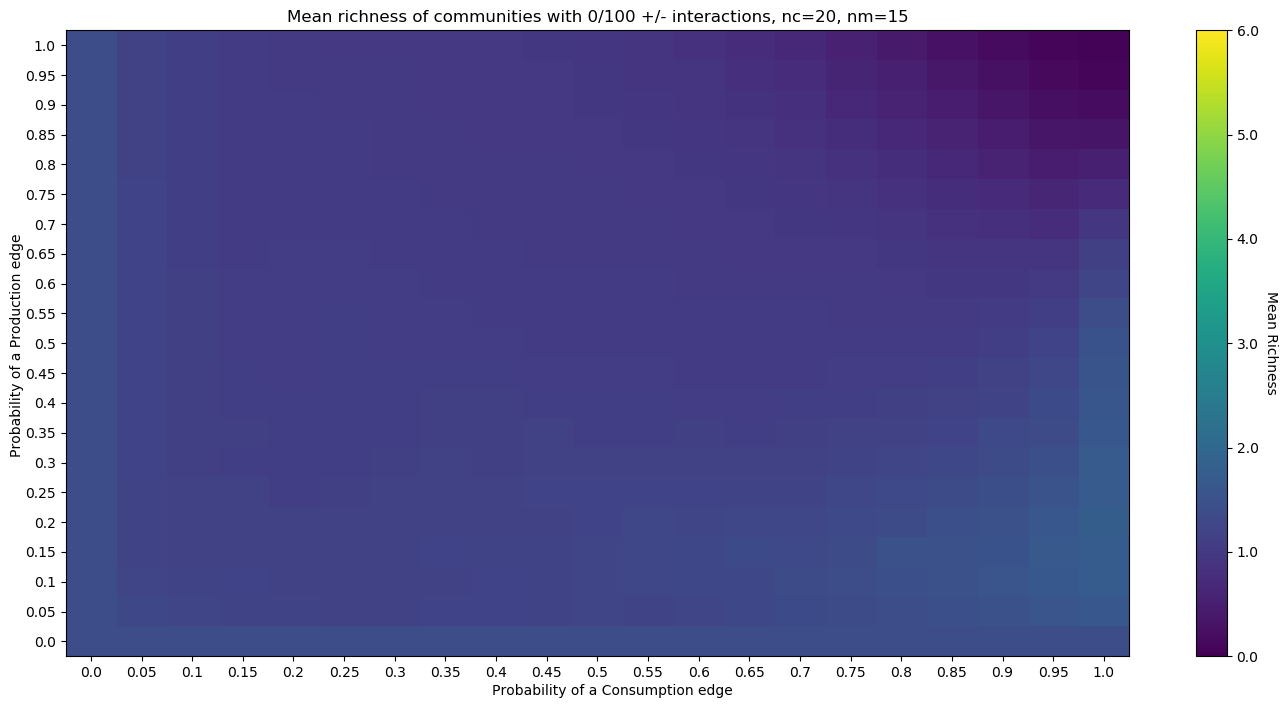

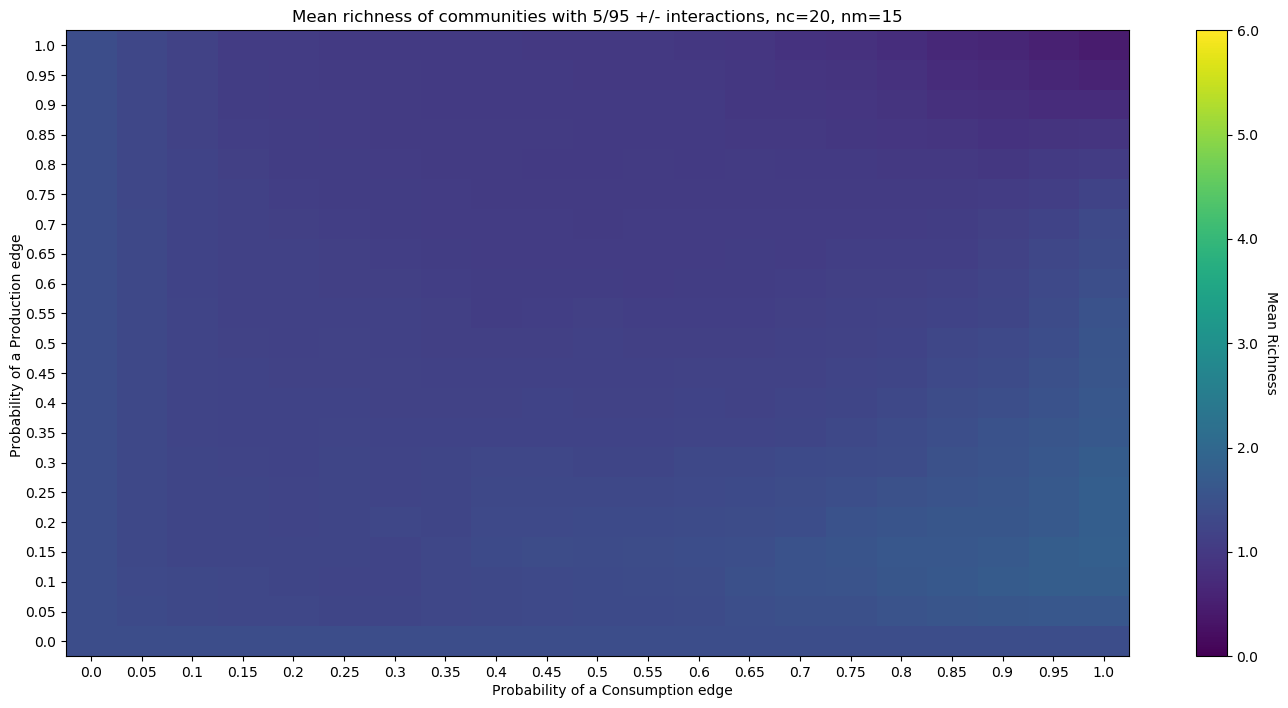

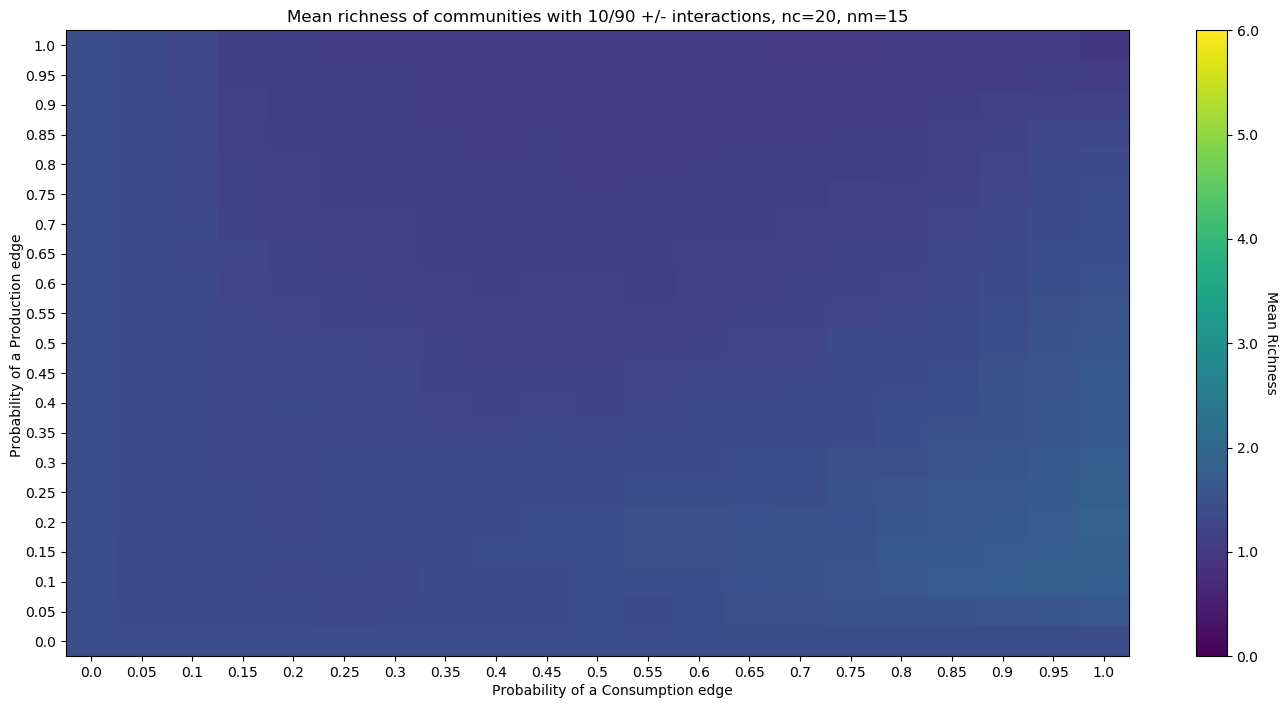

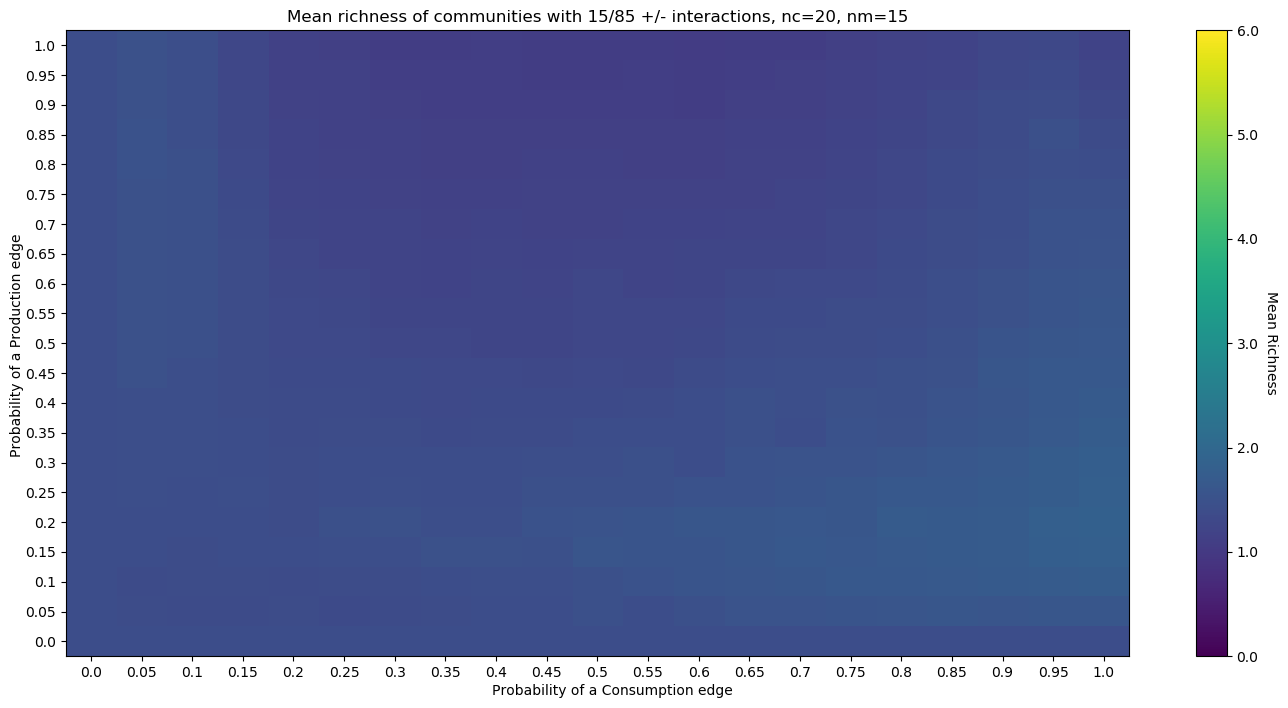

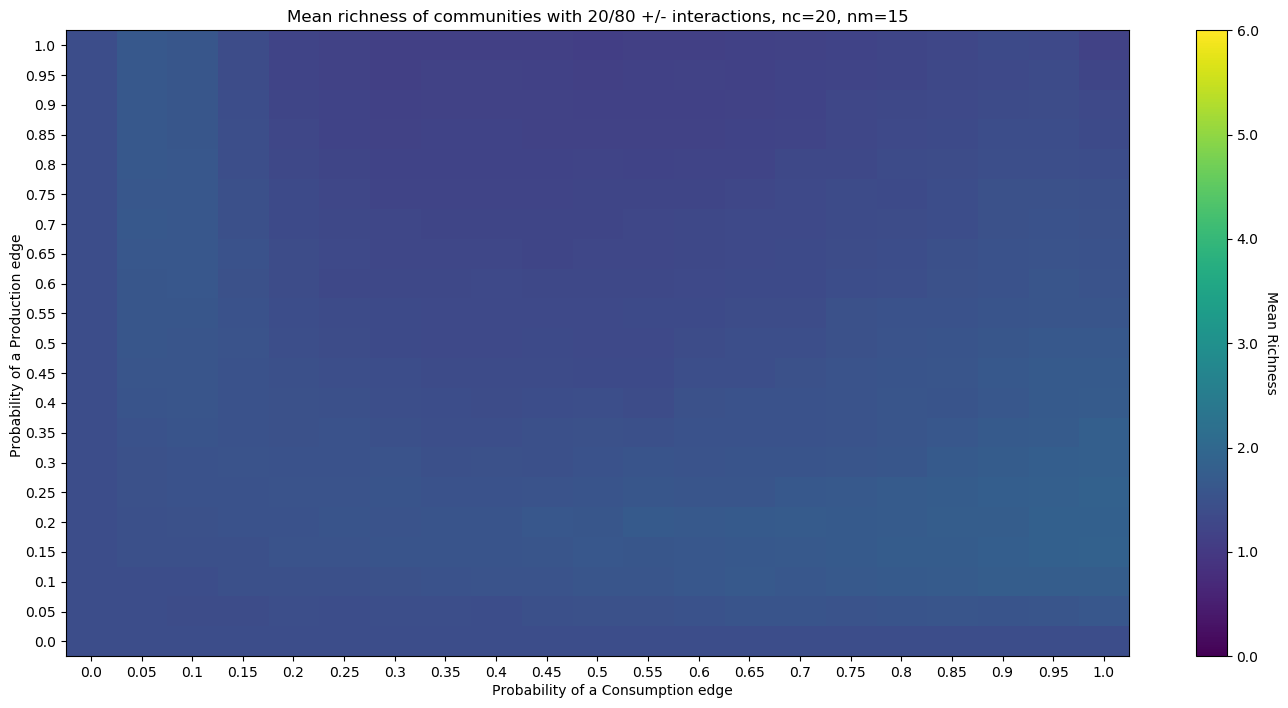

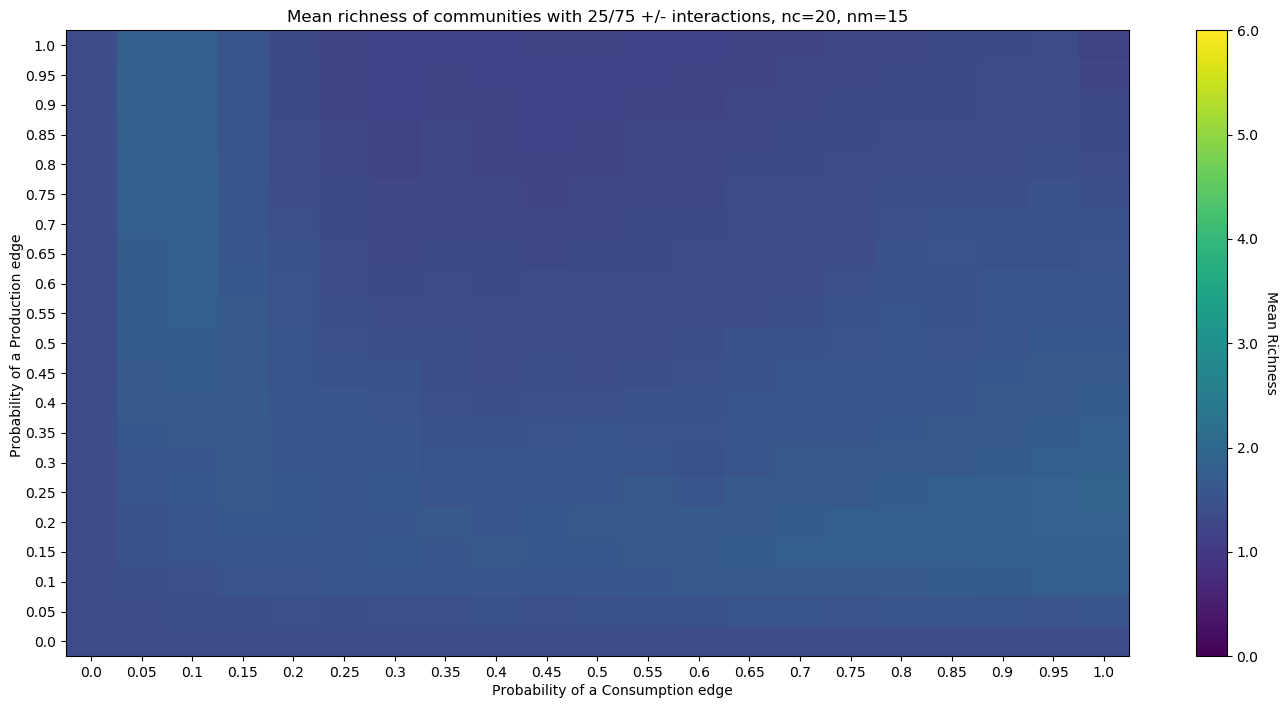

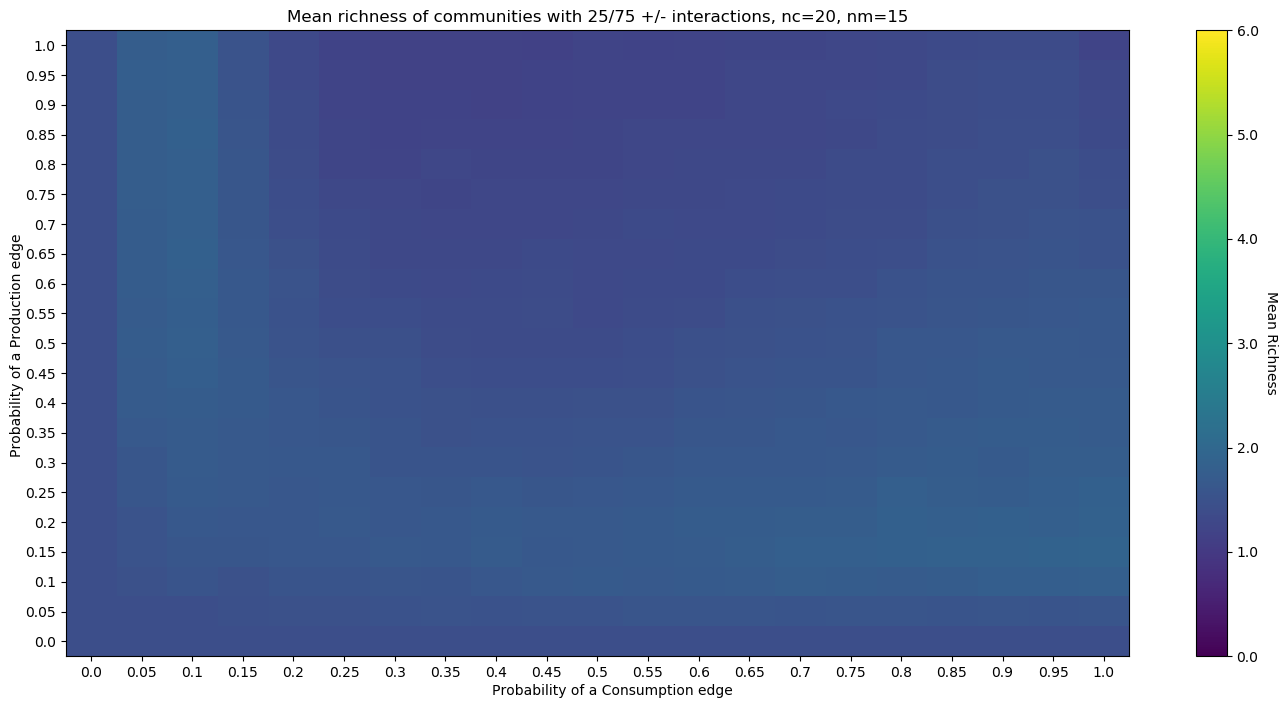

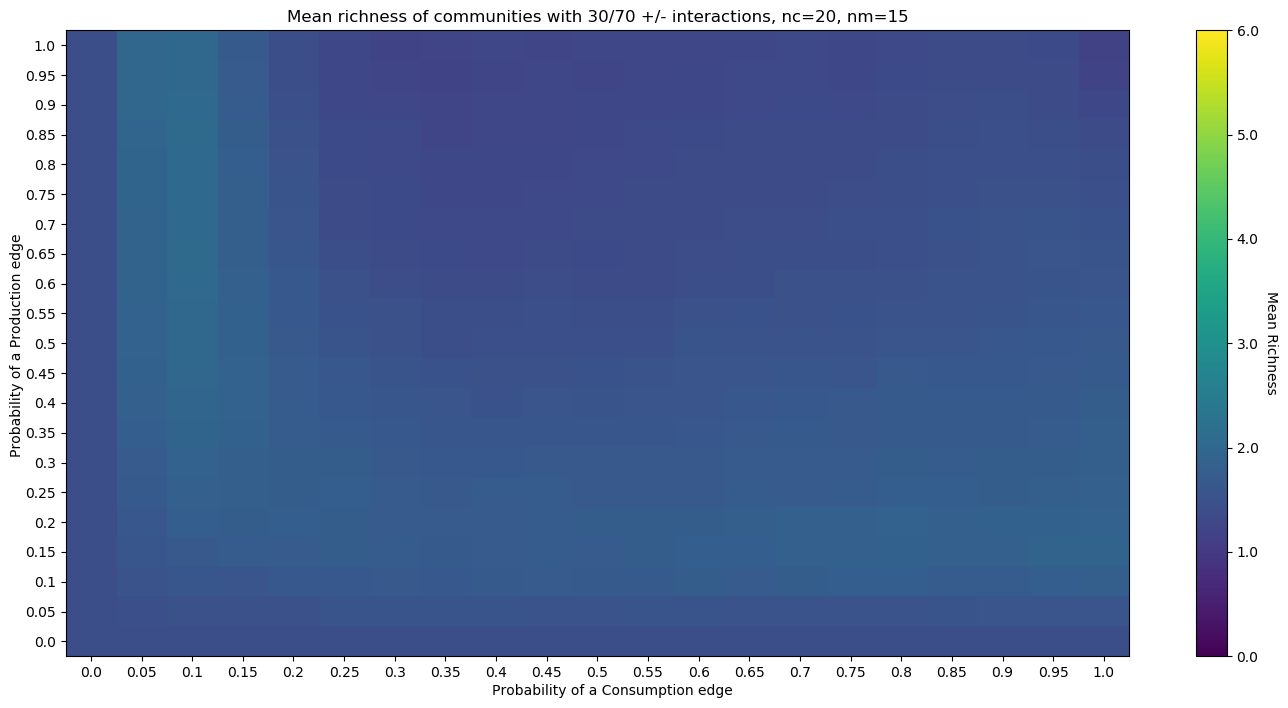

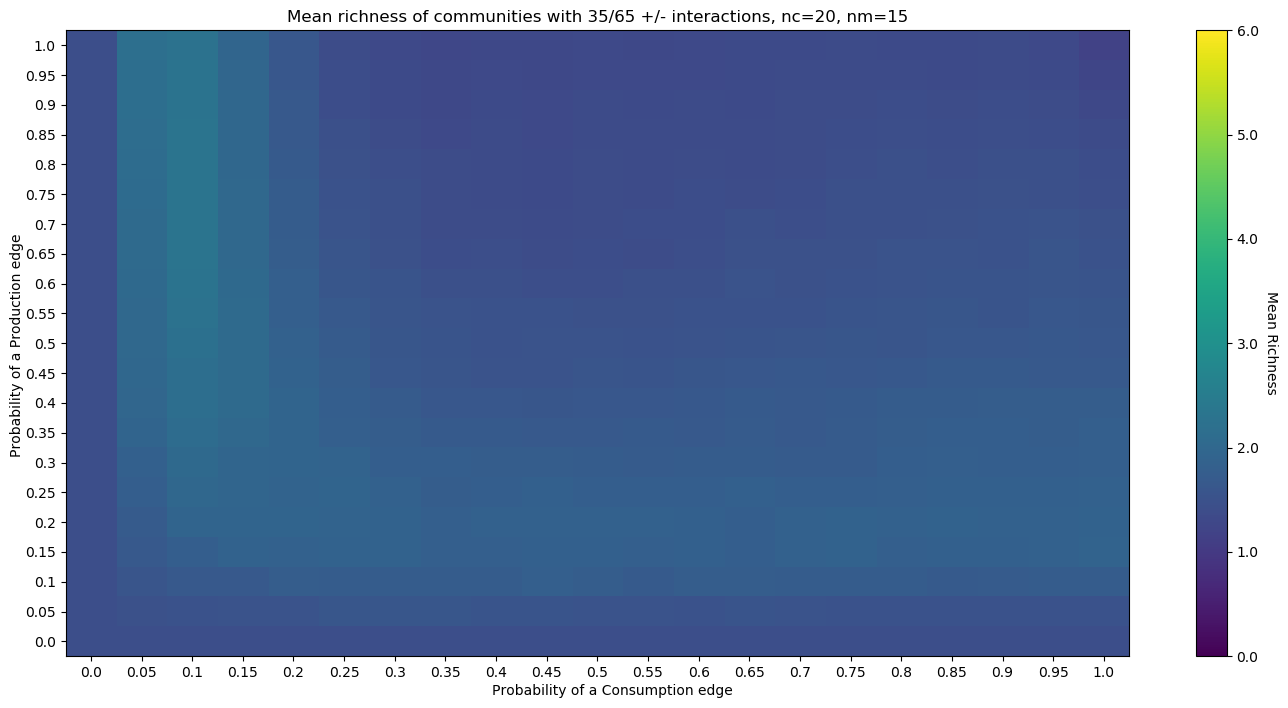

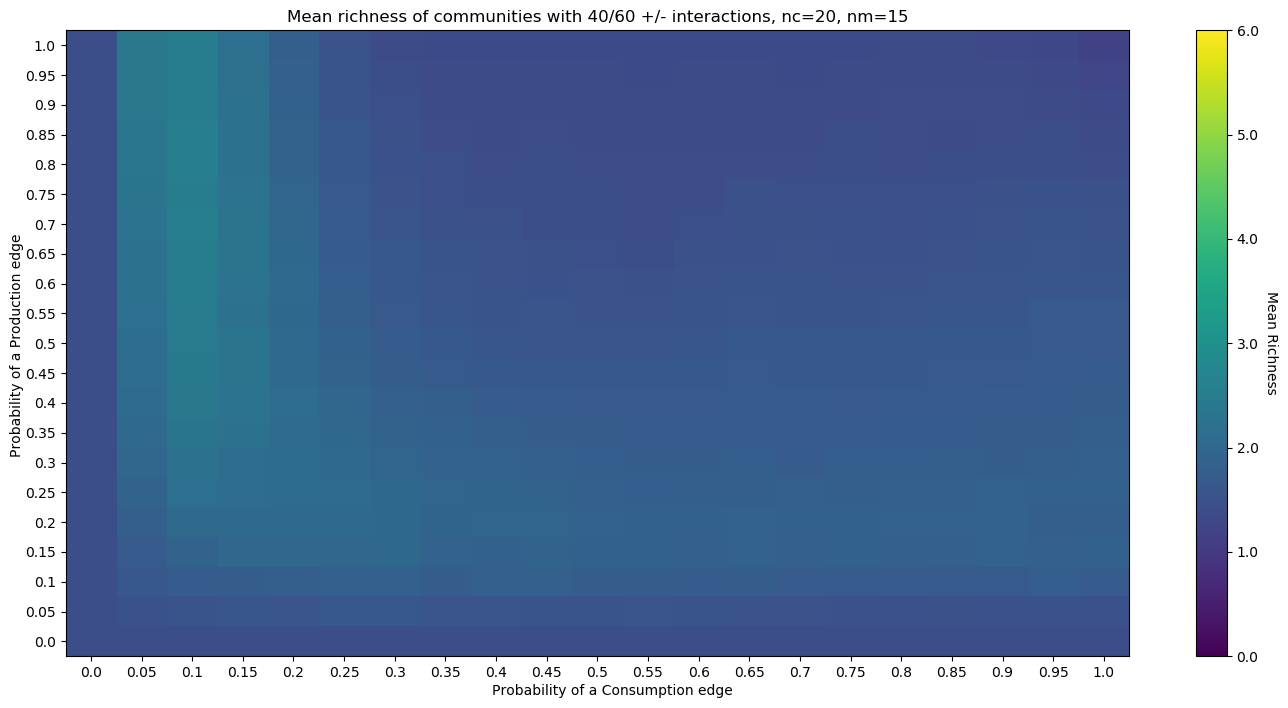

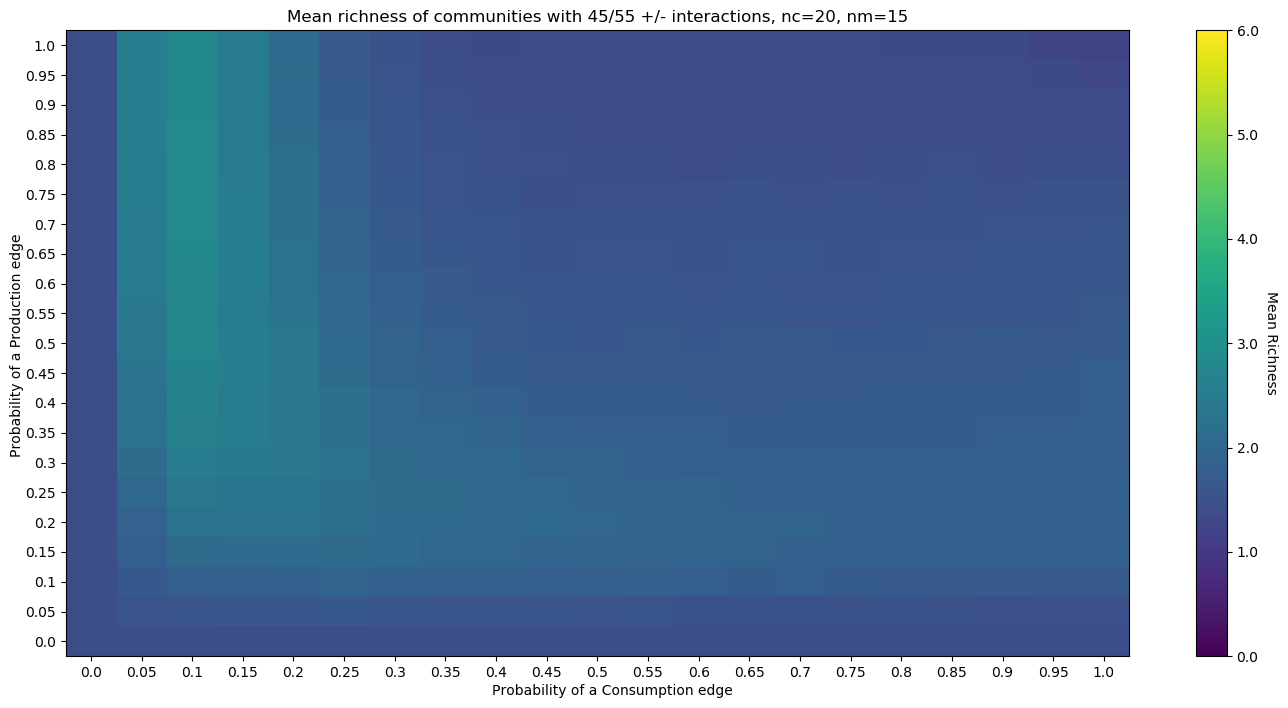

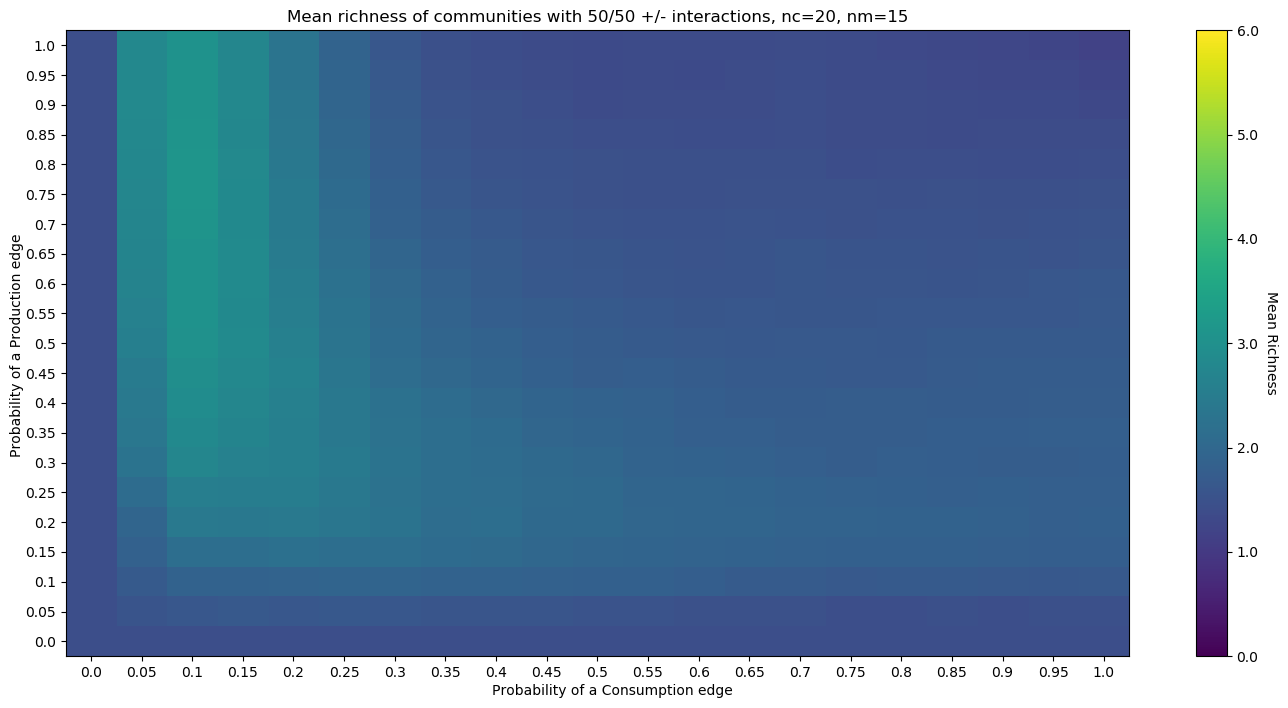

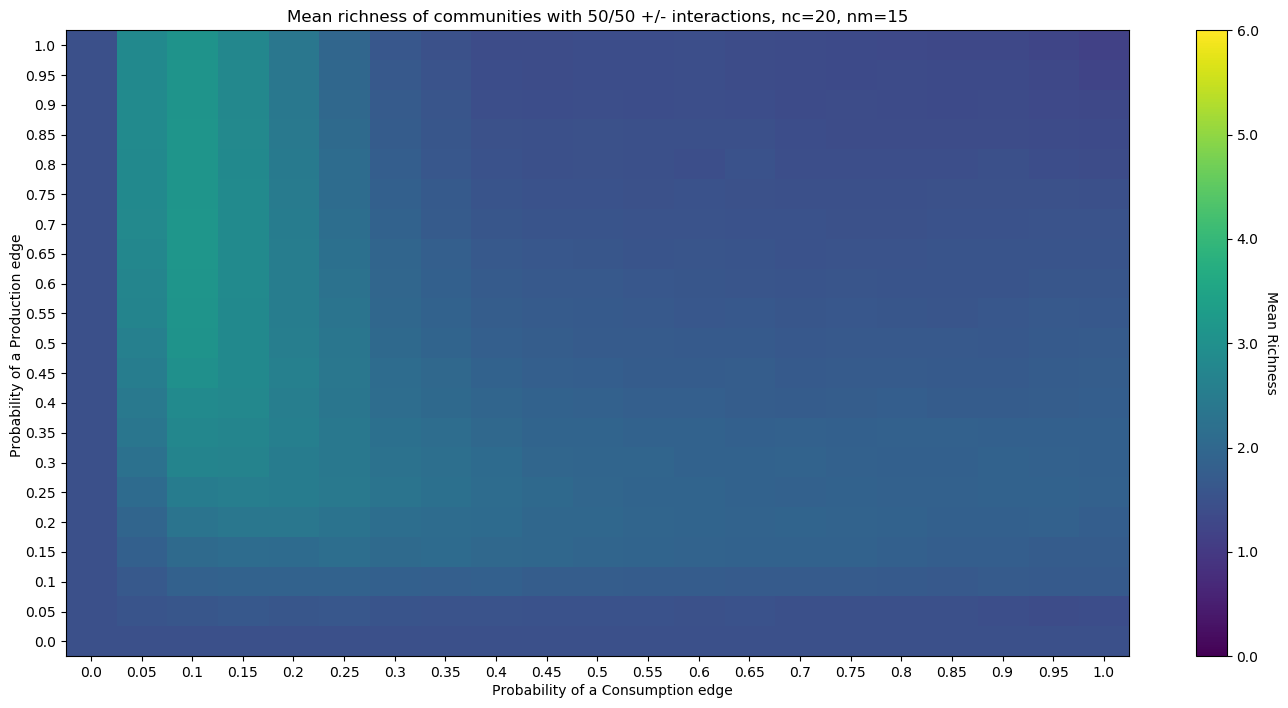

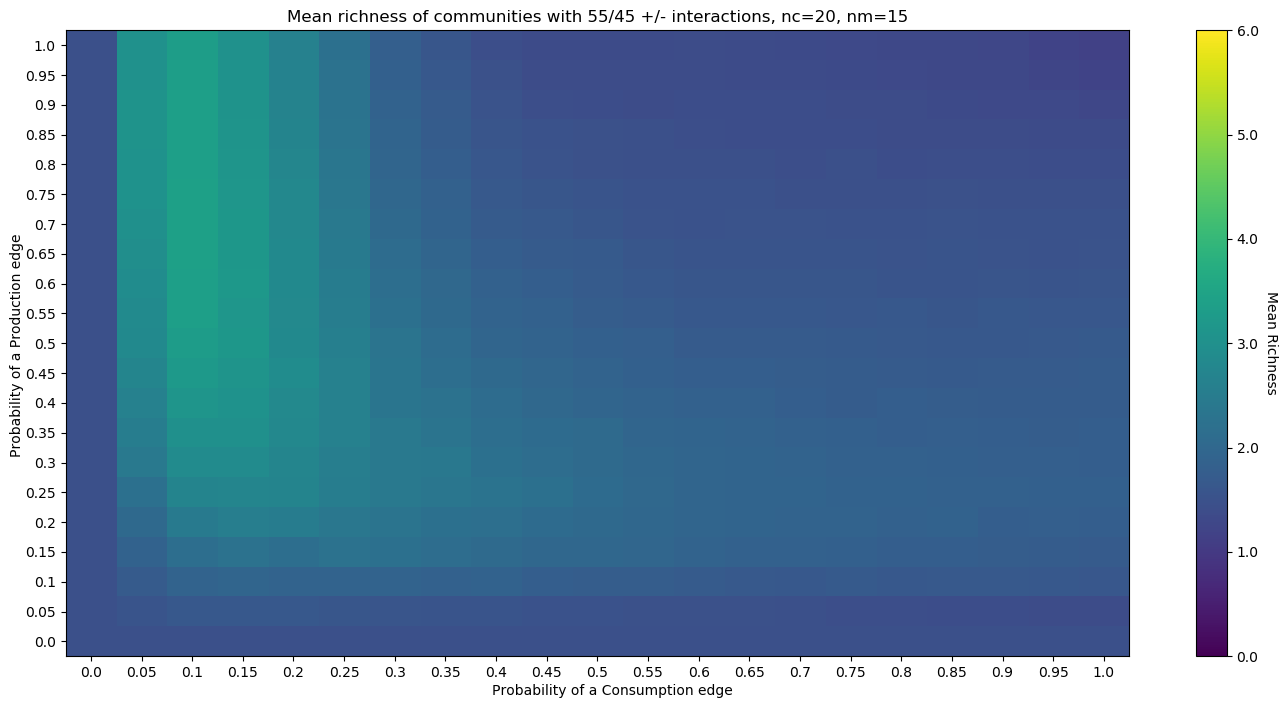

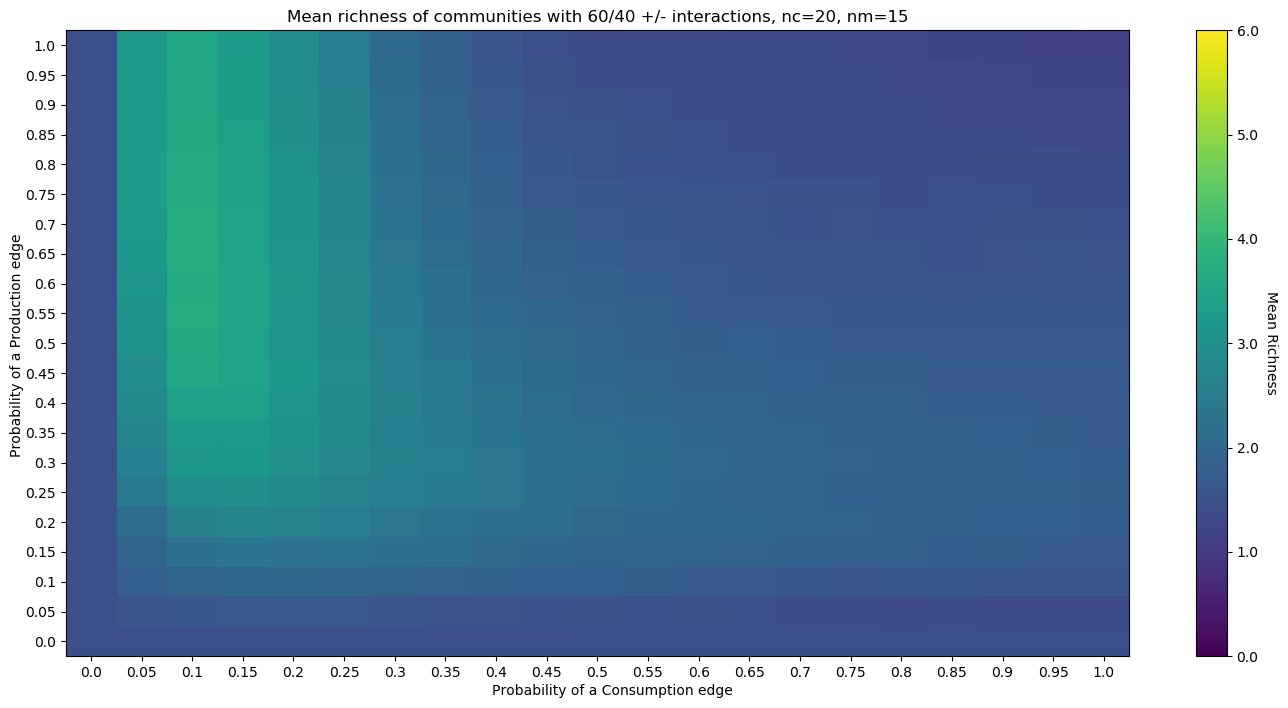

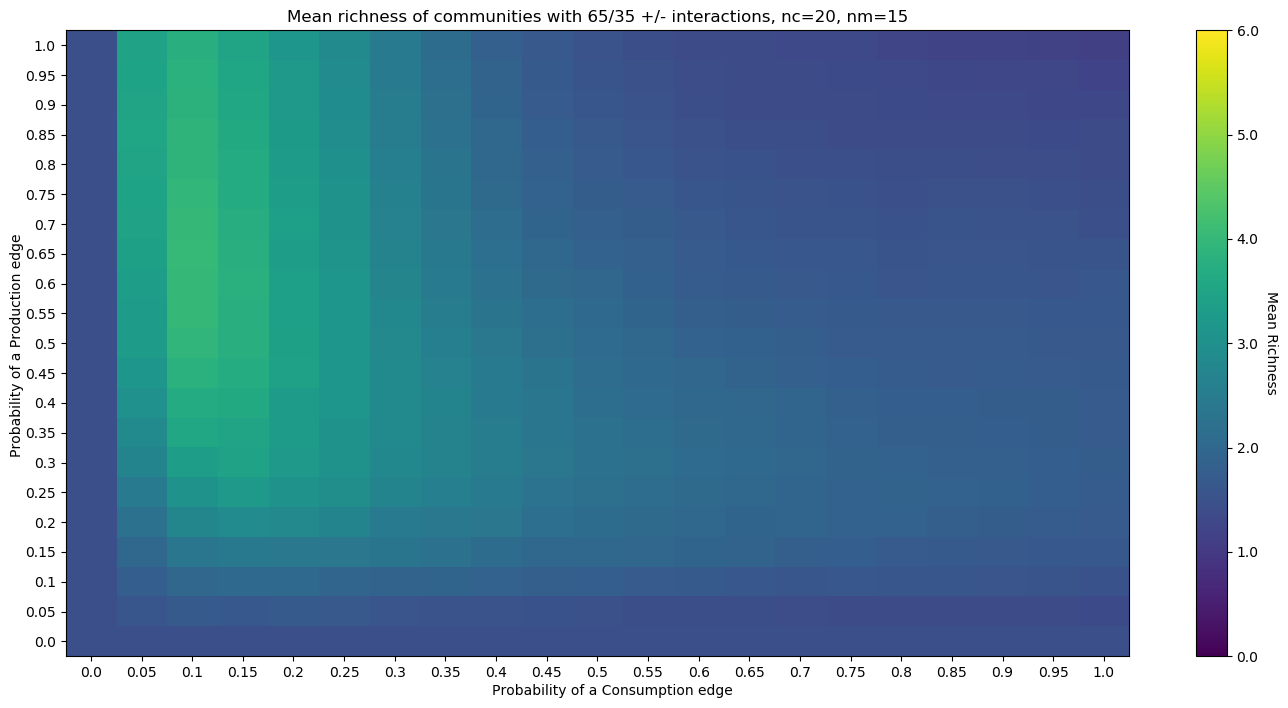

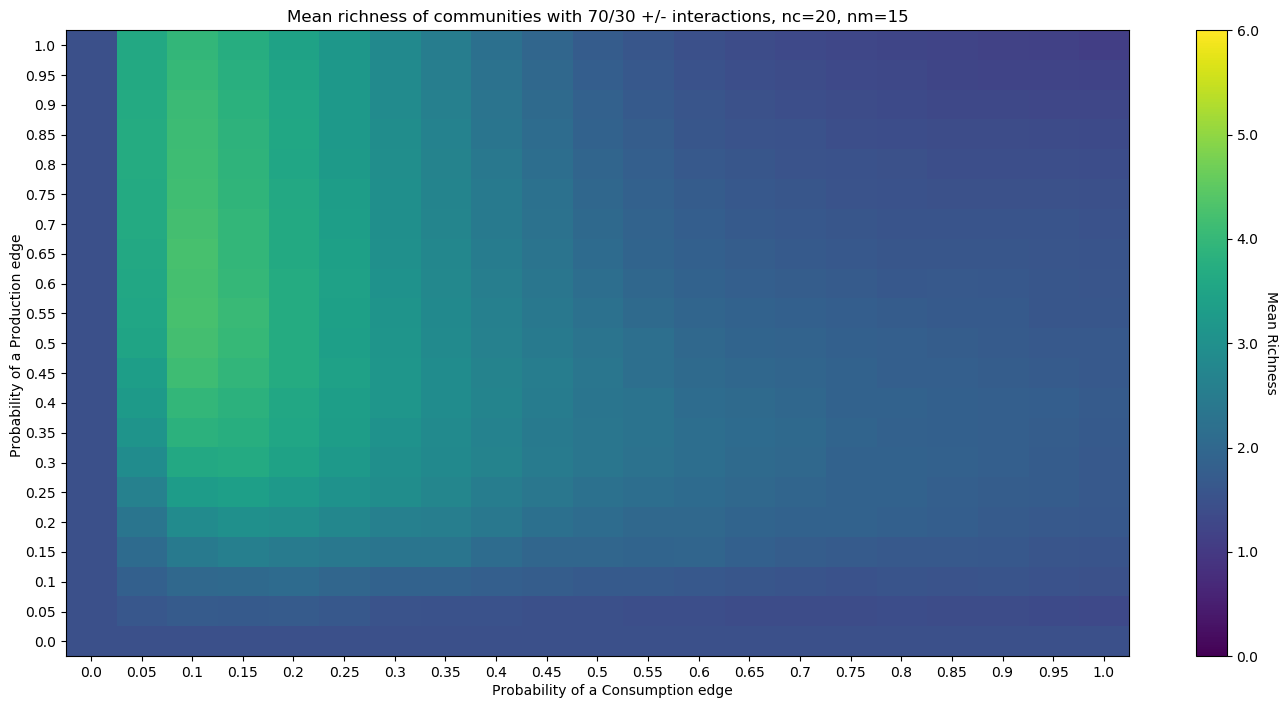

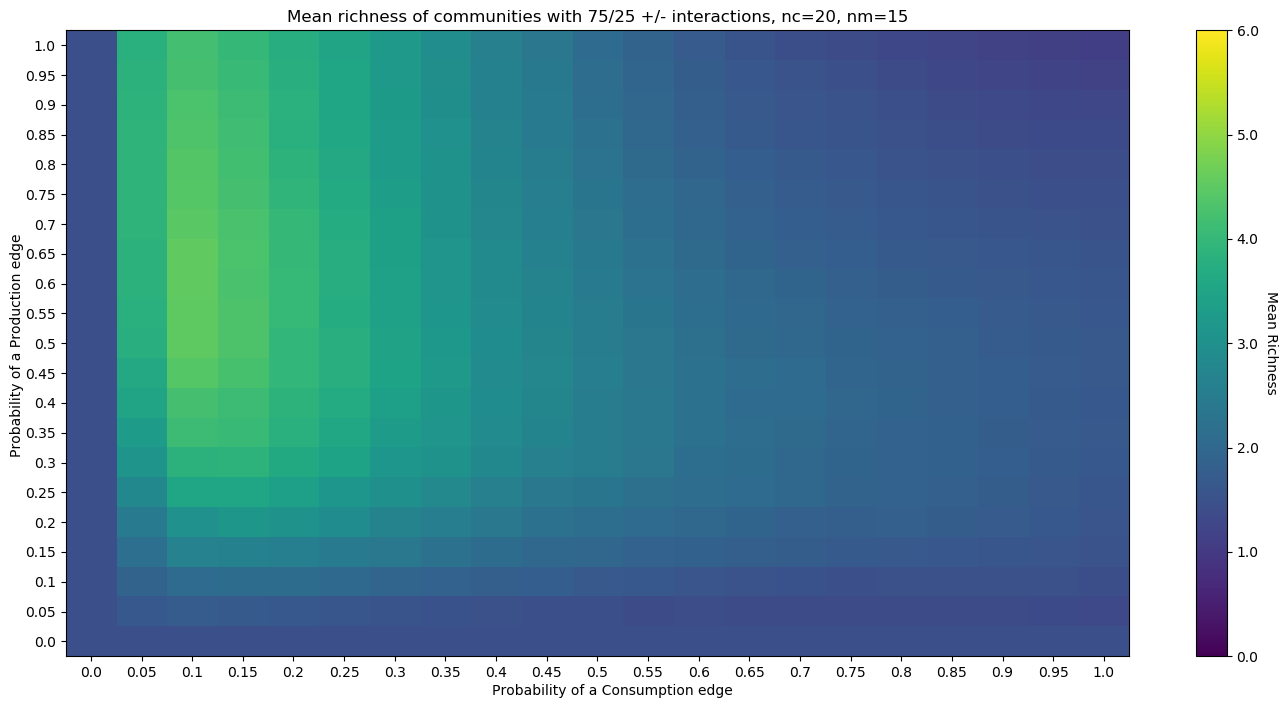

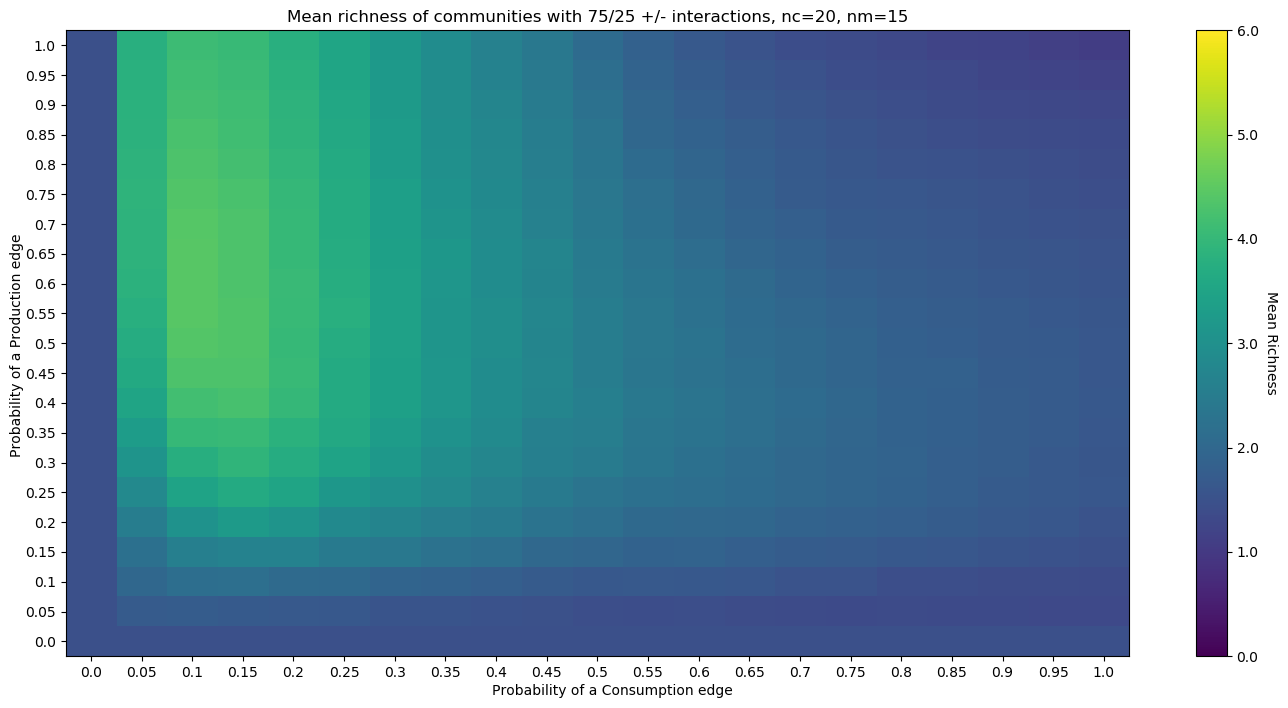

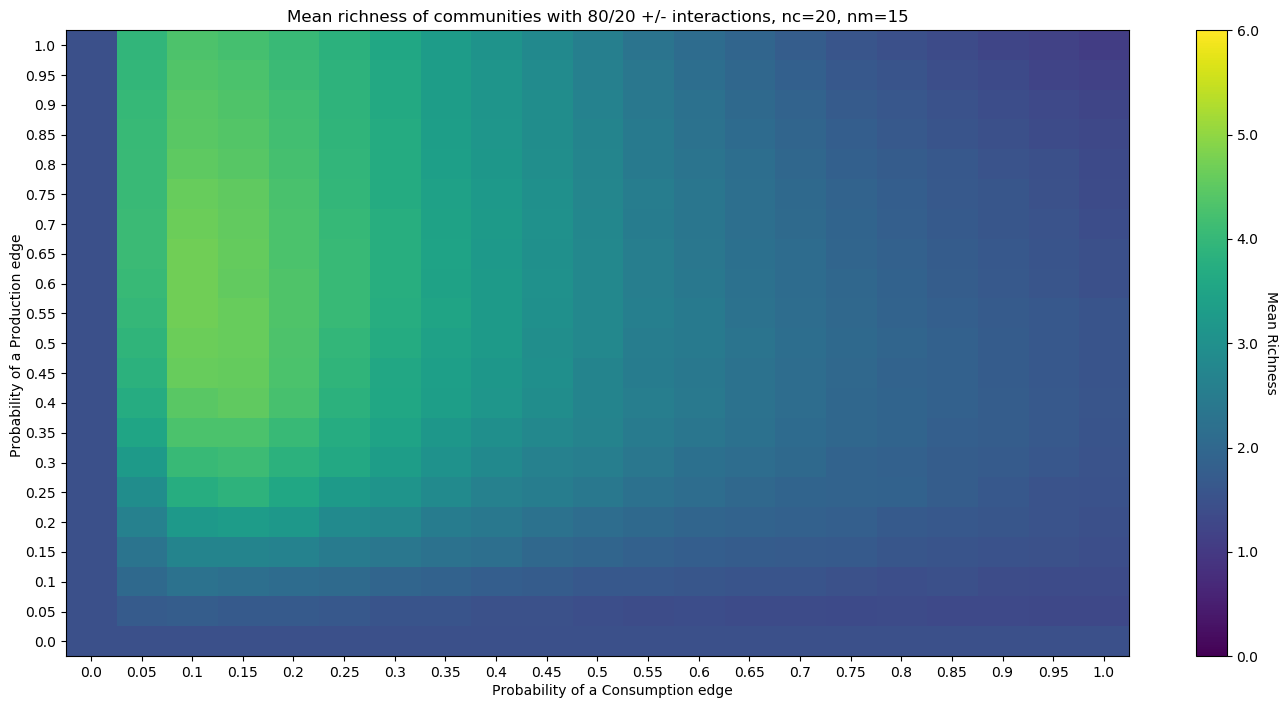

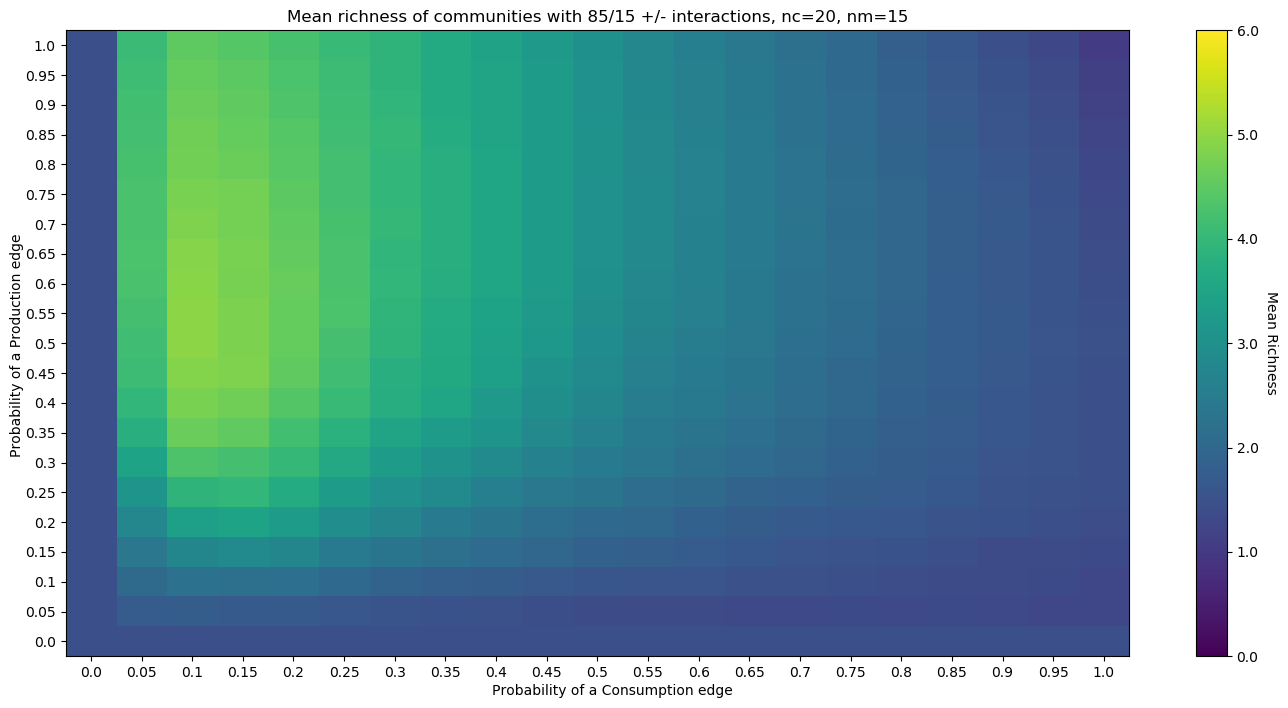

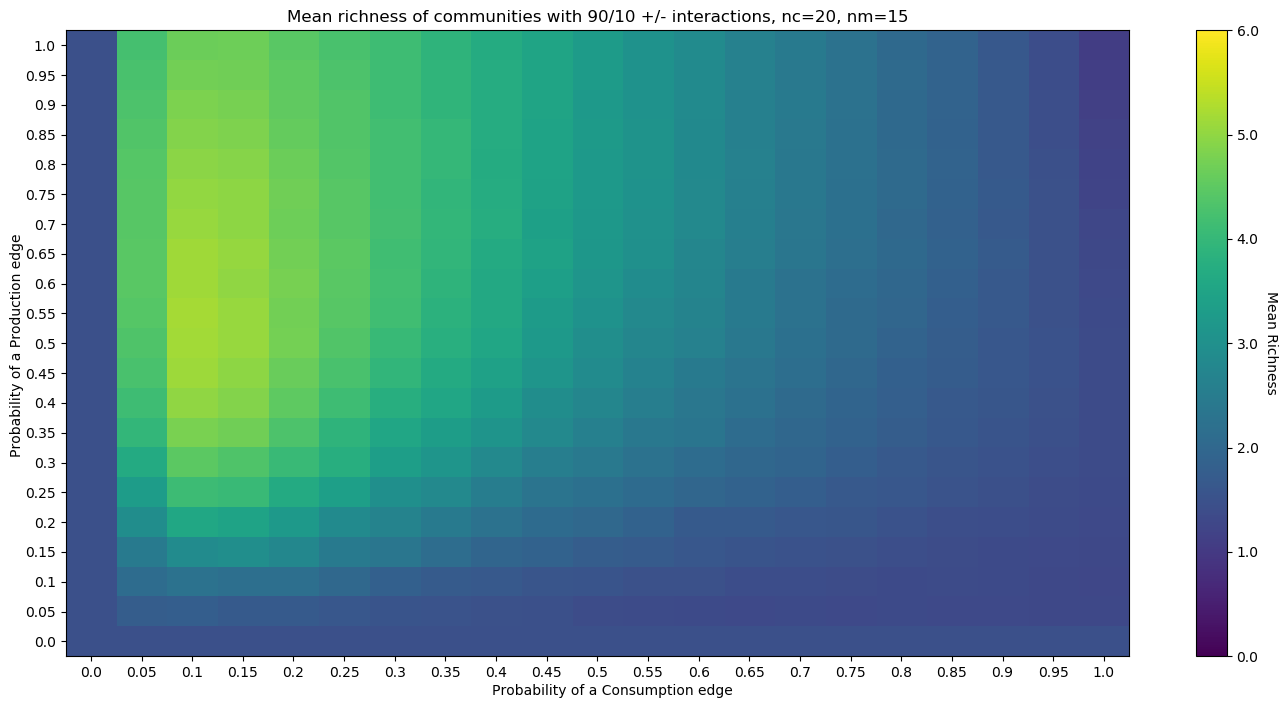

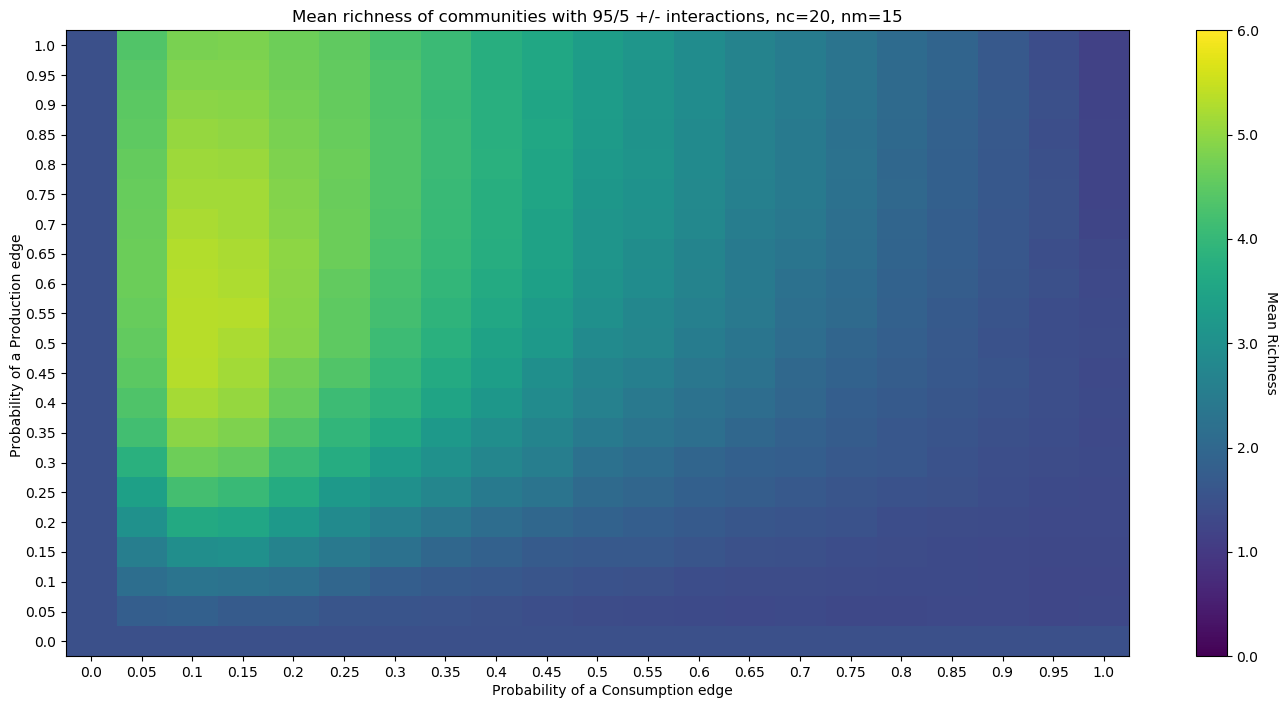

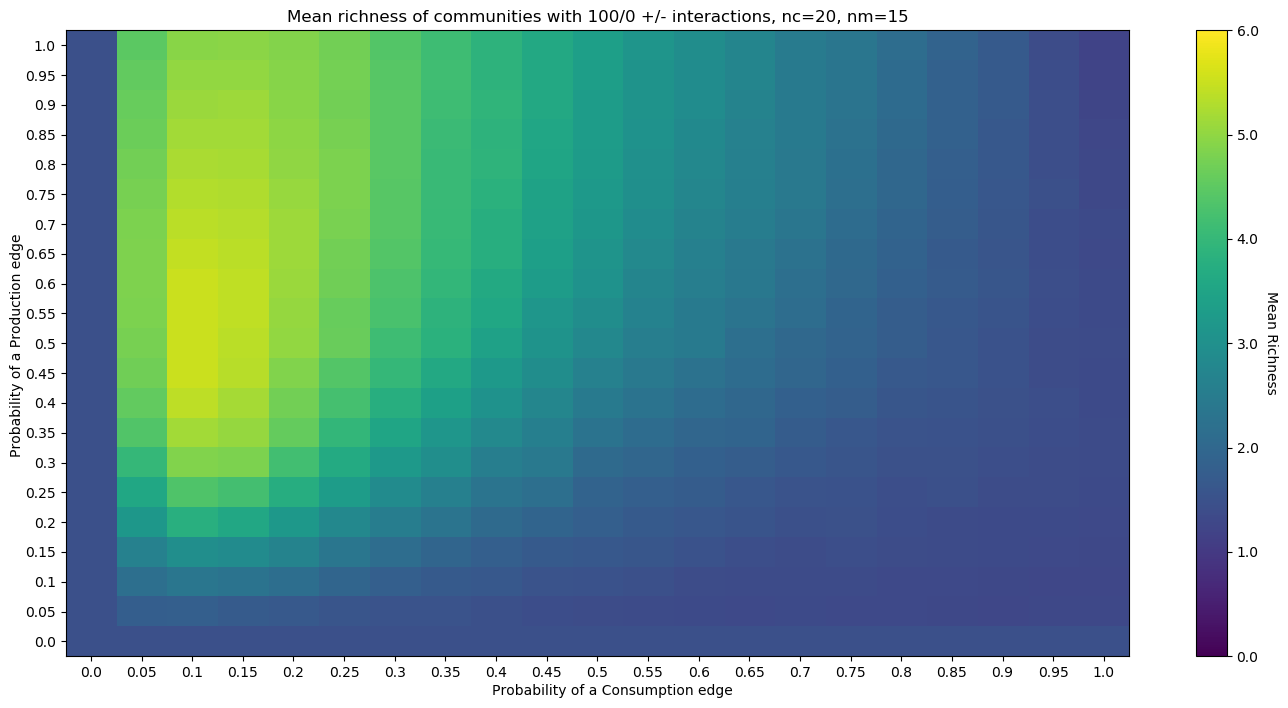

In [12]:
for (NE0DA, params) in zip([NE0D1, NE0D2, NE0D3, NE0D4], [params1, params2, params3, params4])
    fracPosArray = collect(params["minFracPos"]:params["deltaFracPos"]:params["maxFracPos"])
    nFracPos = size(fracPosArray)[1]
    for (fpi, fp) in enumerate(fracPosArray)
        NE0D = NE0DA[fpi, :, :, :, :];
        nm, nc = size(AT)[4:5]

        c = size(NE0D, 1)
        Ameans = zeros(c,c)
        Amedians = zeros(c,c)
        Astd = zeros(c,c)

        axisvals = (collect(1:c) .-1) ./ (c-1)

        for qp = 1:c, qc = 1:c
            A = NE0D[qp, qc, 1, :]

            Ameans[qp, qc] = mean(A)
            Amedians[qp, qc] = median(A)
            Astd[qp, qc] = std(A)
        end
        fig, ax = plt.subplots()
        im = ax.imshow(Ameans, origin="lower", aspect="auto", vmin = 0, vmax = 6)
#         im = ax.imshow(Ameans, origin="lower", aspect="auto")
        cbar1 = ax.figure.colorbar(im, ax=ax, format="%0.1f")
        cbar1.ax.set_ylabel("Mean Richness", rotation=-90, va="bottom")
        cbar1.set_clim(0, 6) # to normalize delete this
        ax.set_xticks(0:c-1)
        ax.set_yticks(0:c-1)
        ax.set_xticklabels(axisvals)
        ax.set_yticklabels(axisvals)
        ax.set_title("Mean richness of communities with $(convert(Int64, round(fp*100)))/$(convert(Int64, round((1-fp)*100))) +/- interactions, nc=$nc, nm=$nm")
        fig.text(.43, 0, "Probability of a Consumption edge", ha="center")
        fig.text(0, .5, "Probability of a Production edge", va="center", rotation="vertical")
        fig.set_figheight(7)
        fig.set_figwidth(14)
        fig.tight_layout()
#         fig.savefig("Fine_Mean_Heatmap_nC_$(nc)_nM_$(nm)_fracPos_$(convert(Int64, round(fp*100)))_normed.png", dpi=300)
        fig.savefig("Fine_Mean_Heatmap_nC_$(nc)_nM_$(nm)_fracPos_$(convert(Int64, round(fp*100)))_linear.png", dpi=300)
    end
end